In [1]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/vinee/Downloads/Data Science Batch 3_30 - 5_00/spam.csv",encoding='ISO-8859-1')# fix encoding case
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
def remove_pun(text):
    for i in string.punctuation:
        text = text.replace(i, " ")
    text = text.lower()
    return text

In [5]:
remove_pun("'NLP' is natural language processing,which includes : tokenization : lemmatization")

' nlp  is natural language processing which includes   tokenization   lemmatization'

In [6]:
x=data['v2']
y=data['v1']

In [7]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [8]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),analyzer='char')
vectorizer

TfidfVectorizer(analyzer='char', ngram_range=(1, 2))

In [11]:
pipe=Pipeline([
    ('Vectorizer',vectorizer),
    ('model',LogisticRegression())
])

In [12]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('model', LogisticRegression())])

In [13]:
pipe.classes_

array(['ham', 'spam'], dtype=object)

In [14]:
y_pred = pipe.predict(x_test)

In [15]:
accuracy_score(y_pred,y_test)*100

98.7443946188341

In [16]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

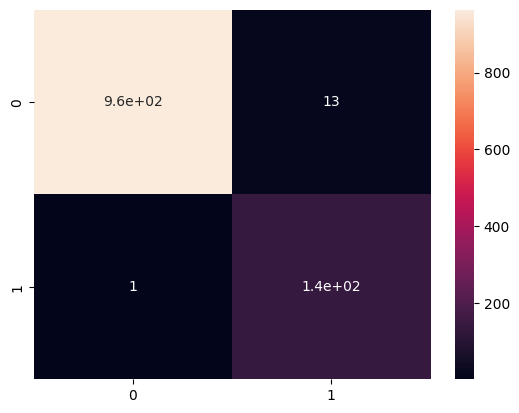

In [17]:
sns.heatmap(cm, annot=True)

In [18]:
pipe.predict(["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."])			


array(['spam'], dtype=object)

In [20]:
import pickle
import streamlit as st

checkfile = open('model.spam','wb')
pickle.dump(pipe,checkfile)
checkfile.close()